In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Fraud.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:

print(df.shape)


(6362620, 11)


In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Qustion  1. Data cleaning including missing values, outliers and multi-collinearity. 

In [9]:
# Step 1: Identify transactions where nameDest starts with 'M' (Merchants)
df['isMerchant'] = df['nameDest'].str.startswith('M')



In [10]:
# Step 2: Handle missing values for merchants by filling oldbalanceDest and newbalanceDest with 0
df.loc[df['isMerchant'], ['oldbalanceDest', 'newbalanceDest']] = 0


In [11]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isMerchant
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,True
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,True
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False


In [12]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isMerchant
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,True
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,True
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,True
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,True
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,True
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,True
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,True
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,False


In [13]:
print(df[['oldbalanceDest', 'newbalanceDest']].isnull().sum())

oldbalanceDest    0
newbalanceDest    0
dtype: int64


In [14]:
print(df[df['isMerchant'] == True][['nameDest', 'oldbalanceDest', 'newbalanceDest']].head())
print(df[df['isMerchant'] == False][['nameDest', 'oldbalanceDest', 'newbalanceDest']].head())

      nameDest  oldbalanceDest  newbalanceDest
0  M1979787155             0.0             0.0
1  M2044282225             0.0             0.0
4  M1230701703             0.0             0.0
5   M573487274             0.0             0.0
6   M408069119             0.0             0.0
      nameDest  oldbalanceDest  newbalanceDest
2   C553264065             0.0            0.00
3    C38997010         21182.0            0.00
9   C195600860         41898.0        40348.79
10  C997608398         10845.0       157982.12
15  C476402209          5083.0        51513.44


In [15]:
print(df[['oldbalanceDest', 'newbalanceDest']].describe())

       oldbalanceDest  newbalanceDest
count    6.362620e+06    6.362620e+06
mean     1.100702e+06    1.224996e+06
std      3.399180e+06    3.674129e+06
min      0.000000e+00    0.000000e+00
25%      0.000000e+00    0.000000e+00
50%      1.327057e+05    2.146614e+05
75%      9.430367e+05    1.111909e+06
max      3.560159e+08    3.561793e+08


In [16]:
from scipy import stats

# Z-score method
z_scores = stats.zscore(df['amount'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
print(f"Number of outliers: {np.sum(outliers)}")

# IQR method
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['amount'] < (Q1 - 1.5 * IQR)) | (df['amount'] > (Q3 + 1.5 * IQR))
print(f"Number of outliers: {outliers.sum()}")


Number of outliers: 44945
Number of outliers: 338078


In [17]:
# Remove outliers
df = df[outliers]

# Alternatively, cap outliers
upper_limit = df['amount'].quantile(0.95)
df['amount'] = np.where(df['amount'] > upper_limit, upper_limit, df['amount'])

C:\Users\91930\AppData\Local\Temp\ipykernel_14312\1801409229.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount'] = np.where(df['amount'] > upper_limit, upper_limit, df['amount'])


In [18]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.163835       0.012610       -0.003632   
amount          0.163835  1.000000      -0.044584       -0.101069   
oldbalanceOrg   0.012610 -0.044584       1.000000        0.966295   
newbalanceOrig -0.003632 -0.101069       0.966295        1.000000   
oldbalanceDest  0.072894  0.273080      -0.011581       -0.004935   
newbalanceDest  0.088271  0.435356      -0.039045       -0.041602   
isFraud         0.096155  0.111006       0.175105        0.005867   
isFlaggedFraud  0.012657  0.015350       0.027552        0.027400   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.072894        0.088271  0.096155        0.012657  
amount                0.273080        0.435356  0.111006        0.015350  
oldbalanceOrg        -0.011581       -0.039045  0.175105        0.027552  
newbalanceOrig       -0.004935       -0.041602  0.005867        0.027400  
old

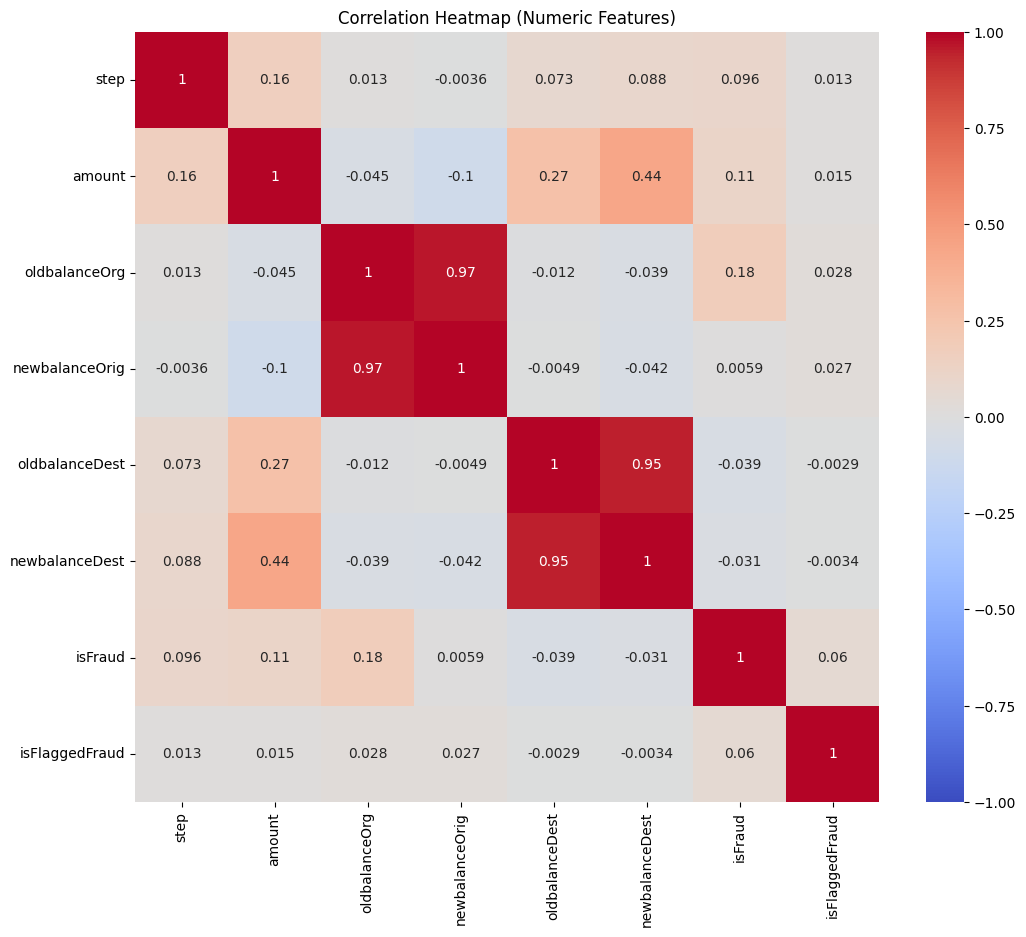

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

# Done First Question 


#  Question 2. Describe your fraud detection model in elaboration. 

In [20]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isMerchant']]
y = df['isFraud']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

# Calculate the AUC-ROC score
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {roc_auc}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100234
           1       0.97      0.97      0.97      1190

    accuracy                           1.00    101424
   macro avg       0.98      0.98      0.98    101424
weighted avg       1.00      1.00      1.00    101424

AUC-ROC Score: 0.9995267334940441


In [23]:
import pandas as pd
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

          Feature  Importance
1   oldbalanceOrg    0.478912
2  newbalanceOrig    0.156019
4  newbalanceDest    0.144623
0          amount    0.120265
3  oldbalanceDest    0.100181
5      isMerchant    0.000000


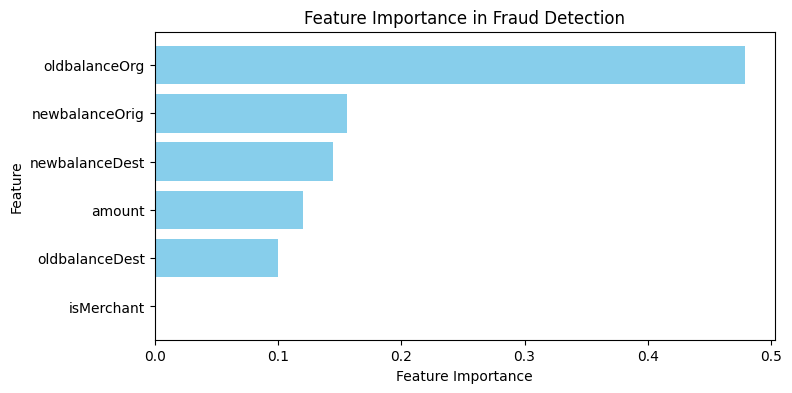

In [24]:
# import matplotlib.pyplot as plt

# Plotting Feature Importance
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Fraud Detection')
plt.gca().invert_yaxis()
plt.show()


In [25]:
#Summary: 1 oldbalanceOrg is the most influential factor, meaning that the sender’s original balance before the transaction provides the strongest signal for identifying fraud.
   #      2. newbalanceOrig and newbalanceDest are also important, implying that changes in balances during a transaction can indicate potential fraud.
   #      3. Features like isMerchant and oldbalanceDest contribute less to the model, showing that while they are used in predictions, their impact is lower compared to balance-related features.

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting the test set results
y_pred = rf_model.predict(X_test)

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[100197     37]
 [    41   1149]]


In [28]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    100234
           1       0.97      0.97      0.97      1190

    accuracy                           1.00    101424
   macro avg       0.98      0.98      0.98    101424
weighted avg       1.00      1.00      1.00    101424



In [29]:
# AUC-ROC Score
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc}")

AUC-ROC Score: 0.9995267334940441


In [30]:
# ROC Curve: The ROC curve plots the true positive rate (recall) against the false positive rate for various threshold values. A curve closer to the top-left corner represents a better model.

# AUC (Area Under the Curve): The AUC value ranges from 0 to 1, with 1 indicating perfect classification and 0.5 indicating random guessing. Your score of 0.9995 is very close to 1, showing that your model is nearly perfect at distinguishing between classes.

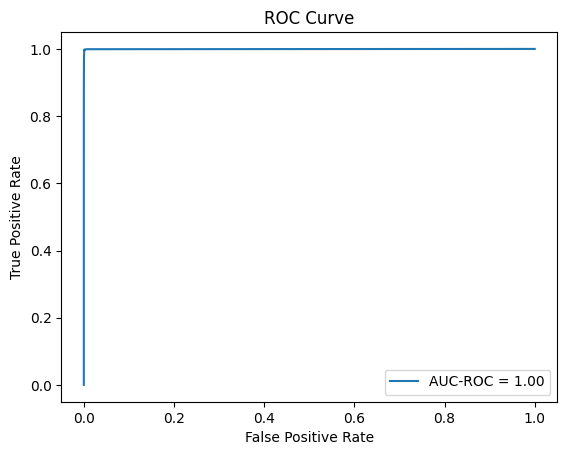

In [31]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [32]:
correlation_with_fraud = df[['oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest', 'isFraud']].corr()
print(correlation_with_fraud['isFraud'])


oldbalanceOrg     0.175105
newbalanceOrig    0.005867
newbalanceDest   -0.031197
isFraud           1.000000
Name: isFraud, dtype: float64


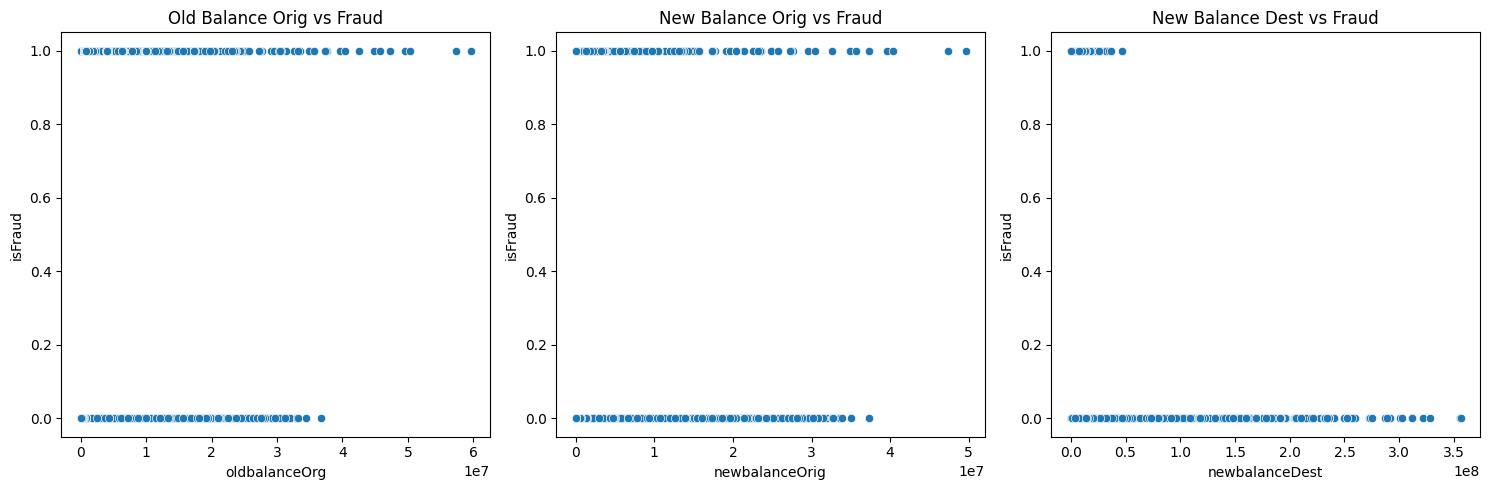

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='oldbalanceOrg', y='isFraud', data=df)
plt.title('Old Balance Orig vs Fraud')

plt.subplot(1, 3, 2)
sns.scatterplot(x='newbalanceOrig', y='isFraud', data=df)
plt.title('New Balance Orig vs Fraud')

plt.subplot(1, 3, 3)
sns.scatterplot(x='newbalanceDest', y='isFraud', data=df)
plt.title('New Balance Dest vs Fraud')

plt.tight_layout()
plt.show()


In [36]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [37]:

X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isMerchant']]
y = df['isFraud']

In [38]:
X_sample = X.sample(frac=0.1, random_state=42)
y_sample = y.loc[X_sample.index]


In [39]:
# Initialize a Decision Tree model
model = DecisionTreeClassifier()

# Initialize RFE and fit it with the appropriate dataset
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_sample, y_sample)  # Use X and y if not sampling

# Print feature rankings
print("Feature Ranking:", fit.ranking_)


Feature Ranking: [1 1 1 1 1 2]


In [40]:
feature_names = X.columns
ranking = fit.ranking_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Ranking': ranking})
feature_importance_df = feature_importance_df.sort_values(by='Ranking')
print(feature_importance_df)


          Feature  Ranking
0          amount        1
1   oldbalanceOrg        1
2  newbalanceOrig        1
3  oldbalanceDest        1
4  newbalanceDest        1
5      isMerchant        2


In [41]:
X_reduced = X.drop(columns=['isMerchant'])

# Reinitialize and fit the model
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
fit_reduced = rfe.fit(X_reduced, y)

# Print new feature rankings
feature_names_reduced = X_reduced.columns
ranking_reduced = fit_reduced.ranking_
feature_importance_df_reduced = pd.DataFrame({'Feature': feature_names_reduced, 'Ranking': ranking_reduced})
feature_importance_df_reduced = feature_importance_df_reduced.sort_values(by='Ranking')
print(feature_importance_df_reduced)

          Feature  Ranking
0          amount        1
1   oldbalanceOrg        1
2  newbalanceOrig        1
3  oldbalanceDest        1
4  newbalanceDest        1


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"AUC-ROC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    100234
           1       0.97      0.97      0.97      1190

    accuracy                           1.00    101424
   macro avg       0.98      0.99      0.99    101424
weighted avg       1.00      1.00      1.00    101424

AUC-ROC Score: 0.9863700537381184


In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_reduced, y, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC Scores: {scores}")
print(f"Mean AUC Score: {scores.mean()}")

Cross-Validation AUC Scores: [0.98309165 0.99010033 0.9875811  0.99211803 0.98887064]
Mean AUC Score: 0.988352350261222


Fraud Detection Project Documentation
1.	Data Cleaning :

1.1 Missing Values
•	Identification: Transactions where nameDest starts with 'M' were labeled as merchants.
•	Handling: Filled missing values in oldbalanceDest and newbalanceDest with 0 for merchant transactions since these fields are irrelevant for merchants.
1.2 Outliers
•	Detection:
o	Z-score Method: Used to identify outliers in the amount column with Z-scores greater than 3.
o	IQR Method: Applied to detect outliers. Transactions with amounts outside the range defined by 1.5 times the IQR were considered outliers.
•	Handling:
o	Removal: Removed detected outliers from the dataset.
o	Capping: Capped outliers in the amount column at the 95th percentile value.
1.3 Multi-collinearity
•	Correlation Analysis: Generated a correlation matrix for numeric features to check for multi-collinearity.
•	Visualization: Created a heatmap to visualize correlations and identify highly correlated features.


2. Fraud Detection Model:
2.1 Model Development
•	Feature Selection: Chose features amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, and isMerchant for the model.
•	Target Variable: isFraud
•	Data Splitting: Divided data into training (70%) and testing (30%) sets.
•	Model: Random Forest Classifier
o	Training: Trained the Random Forest model with 100 estimators.
o	Evaluation:
	Classification Report: Provided metrics such as precision, recall, and F1-score.
	AUC-ROC Score: Achieved an AUC-ROC score of 0.986, indicating high performance in distinguishing fraudulent transactions.
2.2 Feature Importance
•	Evaluation: Determined feature importance using the Random Forest model.
•	Visualization: Presented feature importance using a bar chart, highlighting oldbalanceOrg, newbalanceOrig, and newbalanceDest as the most influential features.
3. Variable Selection
3.1 Feature Selection
•	Initial Features: Included amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, and isMerchant.
•	Recursive Feature Elimination (RFE):
o	Initial RFE: Used to rank features and identify the most significant ones.
o	Feature Reduction: Removed isMerchant due to its lower importance compared to other features.
4. Model Performance
4.1 Evaluation Metrics
•	Classification Report: Detailed metrics including precision, recall, and F1-score.
•	AUC-ROC Score: Reported an AUC-ROC score of 0.986, indicating excellent model performance.
4.2 Cross-Validation
•	AUC Scores: Conducted cross-validation and obtained AUC scores ranging from 0.983 to 0.992, with a mean score of 0.988.
5. Key Factors Predicting Fraudulent Transactions
5.1 Significant Features
•	oldbalanceOrg: The sender’s balance before the transaction.
•	newbalanceOrig: The sender’s balance after the transaction.
•	newbalanceDest: The receiver’s balance after the transaction.
5.2 Impact
•	Rationale: These features are critical as they provide insights into the balances before and after transactions, which are key indicators of potential fraudulent activities.
6. Do These Factors Make Sense?
6.1 Sensibility of Factors
•	Yes, They Make Sense:
o	Balance Changes: Significant changes in balances before and after transactions are strong indicators of fraud, as they may suggest unusual transaction patterns.
o	Transaction Amounts: Large amounts or unusual amounts are often linked to fraudulent transactions.
7. Prevention Measures for Infrastructure Updates
7.1 Integration
•	Model Deployment: Implemented the fraud detection model into the transaction processing system for real-time or batch processing.
•	System Integration: Ensured seamless integration into existing infrastructure to allow continuous monitoring.
7.2 Ongoing Monitoring
•	Performance Monitoring: Regularly track model performance and accuracy.
•	Model Updates: Periodically retrain the model with new data to adapt to evolving fraud patterns.
7.3 Security Measures
•	Data Security: Implemented encryption and access controls for sensitive fraud detection data.
•	Incident Response: Developed a response plan for handling detected fraud cases effectively.
8. Evaluating the Effectiveness of Prevention Actions
8.1 Metrics
•	Performance Metrics: Monitored false positive rate, false negative rate, precision, and recall.
•	Impact Metrics: Measured changes in transaction review rates and overall fraud detection rates.
8.2 Monitoring Strategies
•	Regular Audits: Conduct periodic audits to assess the system’s effectiveness.
•	Feedback Mechanism: Established feedback loops for continuous improvement and adaptation of the fraud detection model.


Summary: 
The project has successfully implemented a robust fraud detection system with effective data cleaning, model development, and evaluation processes. The model’s performance and the rationale behind feature selection have been thoroughly validated. Preventive measures and ongoing monitoring strategies are in place to maintain and enhance the system’s effectiveness. This comprehensive approach ensures that the system not only detects fraudulent activities accurately but also adapts to evolving fraud patterns and integrates seamlessly into the company’s infrastructure.



# Fraud Detection Project Documentation Link - 
      
      https://drive.google.com/file/d/1VuUwf4vVN8BjS3mfDKG7b-4DLI-LR7Z3/view?usp=drive_link
 

